In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Load data

* using skipinitialspace to remove extra space
* using na_value to see ? as NA

In [82]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', skipinitialspace=True, na_values="?")
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 
                     'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 
                     'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [22]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [57]:
quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
{'Quantitative': quantitative}

{'Quantitative': ['age',
  'fnlwgt',
  'education_num',
  'capital_gain',
  'capital_loss',
  'hours_per_week']}

## Quantitative: have 6 number columns:
* **age:** 17-90
* **fnlwgt:** is sampling weight, we just avoid it now for the simple
* **education_num:** 1-16 years of education
* **capital_gain:** capital gain beside salary
* **capital_loss:** capital lost beside salary
* **hour_per_week**

In [21]:
df.sample(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
20306,47,Self-emp-not-inc,26145,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K
2866,56,Self-emp-not-inc,385632,7th-8th,4,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
29451,38,Private,189916,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,40,United-States,<=50K
22693,36,State-gov,143385,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K
31399,50,Private,201882,Masters,14,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,30,United-States,<=50K


In [59]:
qualitative = [f for f in df.columns if df.dtypes[f] == 'object']
{'Qualitative:': qualitative}

{'Qualitative:': ['workclass',
  'education',
  'marital_status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'native_country',
  'income']}

## Qualitative: have 9 category columns:
* **workclass:**
* **education:**
* **marital_status:**
* **occupation:**
* **relationship:**
* **race:**
* **sex:**
* **native_country:**
* **income:** : target column

### With unique values

In [83]:
df['workclass'].unique()
df['education'].unique()
df['marital_status'].unique()
df['occupation'].unique()
df['relationship'].unique()
df['race'].unique()
df['sex'].unique()
df['native_country'].unique()
df['income'].unique()            

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

array(['Married-civ-spouse', 'Divorced', 'Married-spouse-absent',
       'Never-married', 'Separated', 'Married-AF-spouse', 'Widowed'],
      dtype=object)

array(['Exec-managerial', 'Handlers-cleaners', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

array(['Husband', 'Not-in-family', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

array(['Male', 'Female'], dtype=object)

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

array(['<=50K', '>50K'], dtype=object)

## Missing data

native_country     583
workclass         1836
occupation        1843
dtype: int64

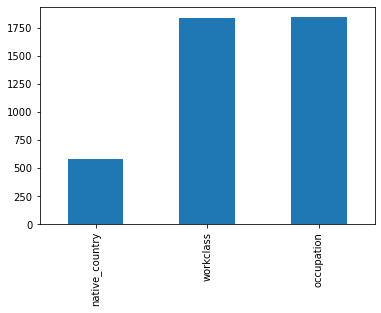

In [85]:
# data = df.replace("?", null)

missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
missing

==========

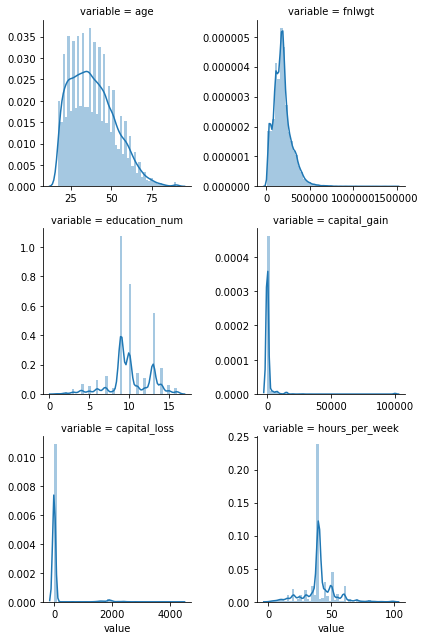

In [86]:
f = pd.melt(df, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

## Transform

In [ ]:
def transform_features(df):
#     df = priority(df)
    return df

tdf = transform_features(df)


## Feature Correlation Matrix

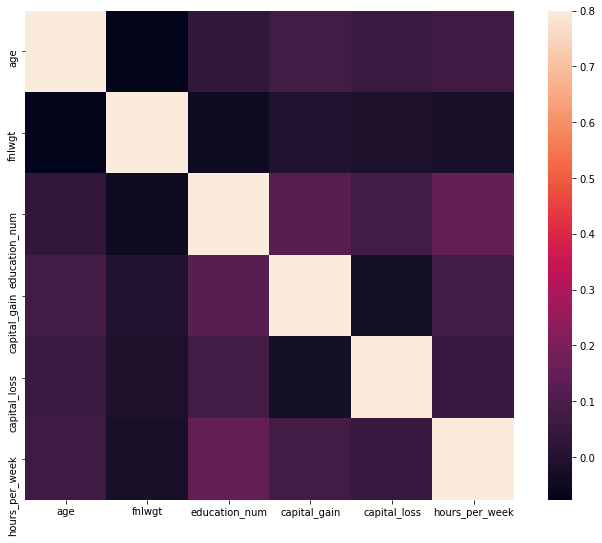

In [88]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);